In [2]:
from tensorflow import keras

In [3]:
model = keras.models.load_model('./logs/Fourth_train//model.h5')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [5]:
from utils.utils import DataGenerator

train, valid = DataGenerator()

Found 1456 images belonging to 4 classes.
Found 365 images belonging to 4 classes.


In [6]:
valid.batch_size = 365

In [7]:
val_data = valid.next()

In [16]:
class_list[1]

'multiple_diseases'

In [15]:
predict

array([[7.3195645e-04, 9.6584028e-01, 3.2747809e-02, 6.7992072e-04]],
      dtype=float32)

In [19]:
predict[0]

array([7.3195645e-04, 9.6584028e-01, 3.2747809e-02, 6.7992072e-04],
      dtype=float32)

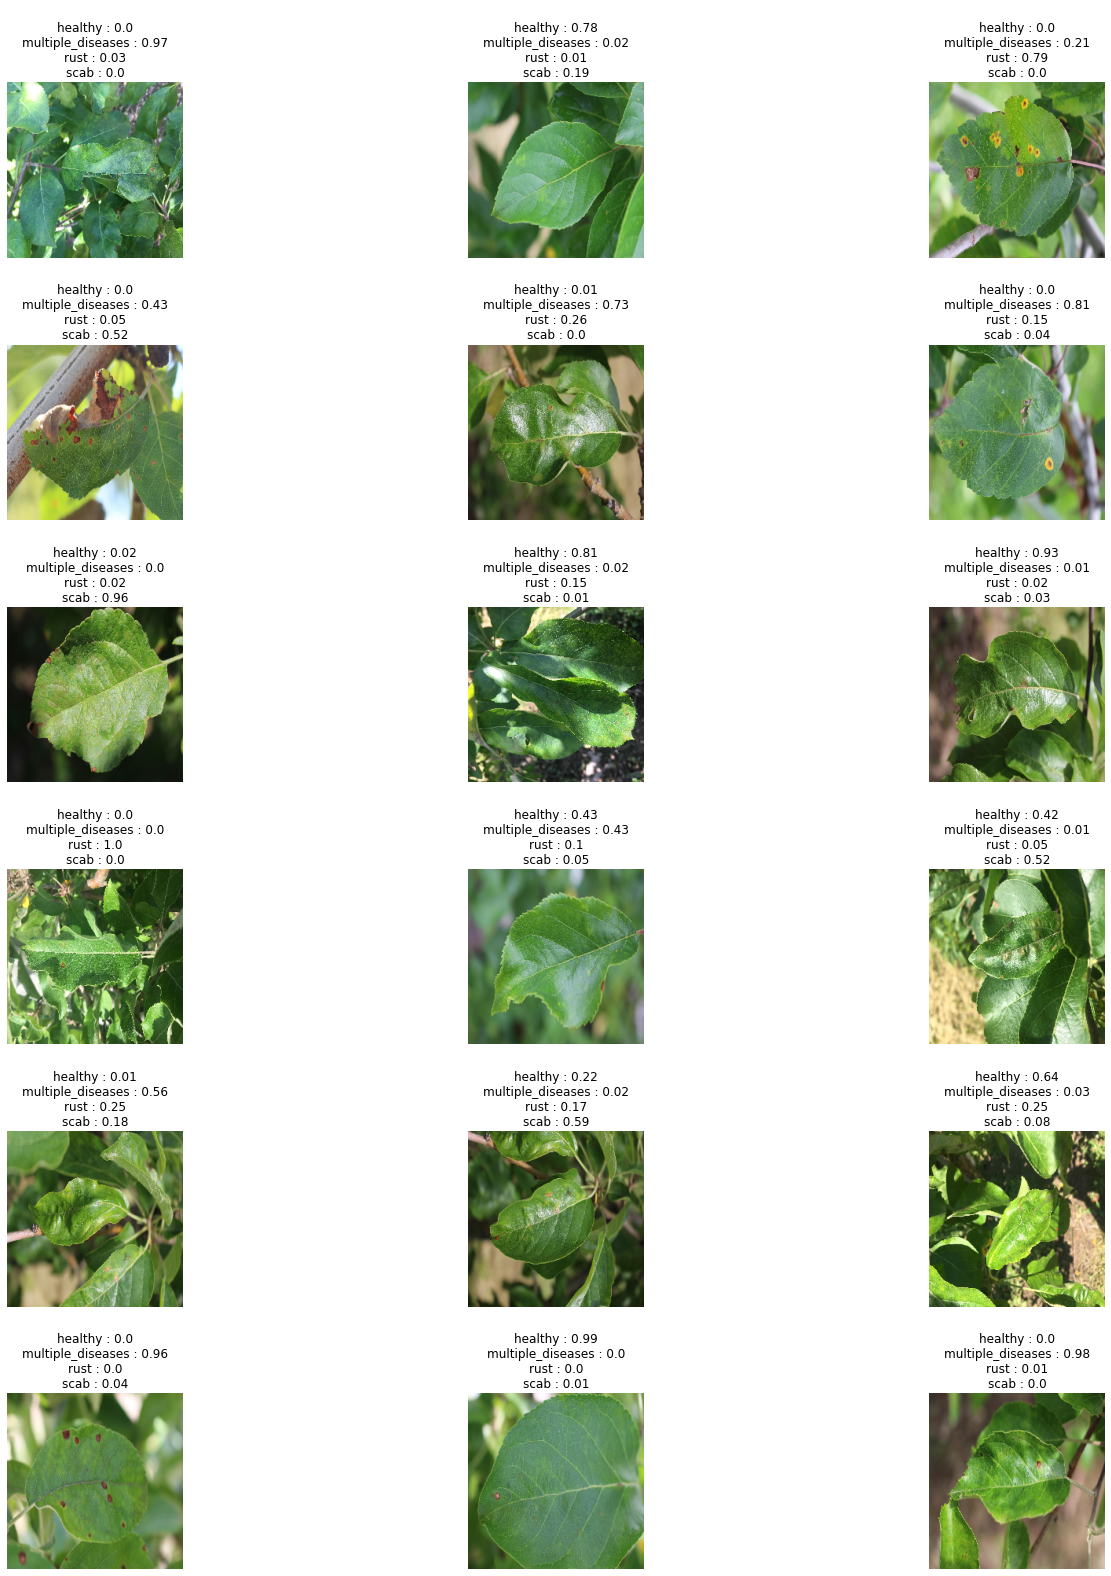

In [29]:
fig = plt.figure(figsize=(22, 22))
rows = 6
cols = 3

class_list = ['healthy', 'multiple_diseases', 'rust', 'scab']

for idx, img in enumerate(val_data[0][val_data[1][:, 1]==1]): 
    
    ax = fig.add_subplot(rows, cols, idx+1)
    
    ax.imshow(img)
    predict = model.predict(np.expand_dims(img, axis=0)).squeeze()
   
    plt.title(f"""
{class_list[0]} : {str(round(predict[0],2))}
{class_list[1]} : {str(round(predict[1],2))}
{class_list[2]} : {str(round(predict[2],2))}
{class_list[3]} : {str(round(predict[3],2))}""")
    ax.axis("off")
fig.tight_layout()

plt.show()

<AxesSubplot:>

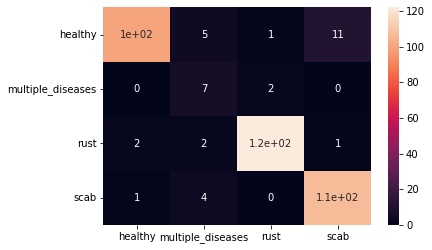

In [9]:
con = confusion_matrix(model.predict(val_data[0]).argmax(axis = 1), val_data[1].argmax(axis = 1))
sn.heatmap(con, annot = True, xticklabels=class_list, yticklabels=class_list)